# Introduction

The `class` `moarchiving.MOArchive` implements a multi-objective (2, 3 and 4 objectives are supported) non-dominated archive. It provides easy and fast access to the overall hypervolume, the contributing hypervolume of each element, and to the [uncrowded hypervolume improvement](https://arxiv.org/abs/1904.08823) of any given point in objective space.



## Testing and timing of `moarchiving.BiobjectiveNondominatedSortedList`

In [1]:
from moarchiving.get_archive import get_archive

### Initialization of `MOArchive` for 2, 3 and 4 objectives
MOArchive object can be created by providing the points and the reference point. 

In [2]:
moa2d = get_archive([[-0.749, -1.188], [-0.557, 1.1076], [0.2454, 0.4724], [-1.146, -0.110]], reference_point=[10, 10], infos=["a", "b", "c", "d"])
print("points in the archive:", moa2d.points)
print("infos of the corresponding points:", moa2d.infos)
print("hypervolume of the archive:", moa2d.hypervolume)

points in the archive: [[-1.146, -0.11], [-0.749, -1.188]]
infos of the corresponding points: ['d', 'a']
hypervolume of the archive: 80658101273473054967643280640231621/649037107316853453566312041152512


In [3]:
moa3d = get_archive([[-0.749, -1.188, 0.341], [-0.557, 1.1076, 3.896], [0.2454, 0.4724, -0.234], [5.433, -1.146, -0.110]], [10, 10, 10], ["a", "b", "c", "d"])
print("points in the archive:", moa3d.points)
print("infos of the corresponding points:", moa3d.infos)
print("hypervolume of the archive:", moa3d.hypervolume)

points in the archive: [[0.2454, 0.4724, -0.234], [5.433, -1.146, -0.11], [-0.749, -1.188, 0.341]]
infos of the corresponding points: ['c', 'd', 'a']
hypervolume of the archive: 14245107714475608640533024409236768782601322425068301/11692013098647223345629478661730264157247460343808


In [4]:
moa4d = get_archive([[-0.749, -1.188, 0.341, 0.123], [-0.557, 1.1076, 3.896, 0.123], [0.2454, 0.4724, -0.234, 0.123], [5.433, -1.146, -0.110, 0.123]],
                    [10, 10, 10, 10], ["a", "b", "c", "d"])
print("points in the archive:", moa4d.points)
print("infos of the corresponding points:", moa4d.infos)
print("hypervolume of the archive:", moa4d.hypervolume)

points in the archive: [[0.2454, 0.4724, -0.234, 0.123], [5.433, -1.146, -0.11, 0.123], [-0.749, -1.188, 0.341, 0.123]]
infos of the corresponding points: ['c', 'd', 'a']
hypervolume of the archive: 633651643746893203865577632918971241408965074860158975691511316507089/52656145834278593348959013841835216159447547700274555627155488768


### Initializing empty archive and adding points
MoArchive can also be initialized with no points, but then the number of objectives must be provided.

In [5]:
moa = get_archive(reference_point=[4, 4, 4], n_obj=3)
print("points in the archive:", moa.points)
print("infos of the corresponding points:", moa.infos)

points in the archive: []
infos of the corresponding points: []


We can always add points to the archive using the `add` method.

In [6]:
# add one point
moa.add([1, 2, 3], "a")
print("points:", moa.points)
print("infos:", moa.infos)

# add another point
moa.add([3, 2, 1], "b")
print("points:", moa.points)
print("infos:", moa.infos)

# add a dominated point (should not be added)
moa.add([3, 3, 3], "c")
print("points:", moa.points)
print("infos:", moa.infos)

points: [[1, 2, 3]]
infos: ['a']
points: [[3, 2, 1], [1, 2, 3]]
infos: ['b', 'a']
points: [[3, 2, 1], [1, 2, 3]]
infos: ['b', 'a']


We can also add multiple points at once using the `add_list` method.

In [7]:
moa.add_list([[2, 1, 3], [1, 3, 2], [3, 2, 0], [2, 2, 4]], ["d", "e", "f", "g"])
print("points:", moa.points)
print("infos:", moa.infos)

points: [[3, 2, 0], [1, 3, 2], [2, 1, 3], [1, 2, 3]]
infos: ['f', 'e', 'd', 'a']


### Hypervolume computation
At any point we can access the hypervolume of the archive using the `hypervolume` attribute.

In [8]:
moa.hypervolume

Fraction(16, 1)

### Dominates and dominators:

In [9]:
moa.dominates([2, 3, 3]), moa.dominators([2, 3, 3])


(True, [[1, 3, 2], [2, 1, 3], [1, 2, 3]])

In [10]:
moa.dominates([3, 1, 1]), moa.dominators([3, 1, 1])


(False, [])

### Contributing hypervolumes

In [11]:
moa.contributing_hypervolumes

[Fraction(5, 1), Fraction(2, 1), Fraction(2, 1), Fraction(1, 1)]

In [12]:
for i, point in enumerate(moa.points):
    assert moa.contributing_hypervolume(point) == moa.contributing_hypervolumes[i]
    print("contributing hv of point", point, "is", moa.contributing_hypervolume(point))

contributing hv of point [3, 2, 0] is 5
contributing hv of point [1, 3, 2] is 2
contributing hv of point [2, 1, 3] is 2
contributing hv of point [1, 2, 3] is 1


### Hypervolume improvement
hypervolume of a dominated point is 0

In [13]:
print(moa.dominates([3, 3, 3]))
moa.hypervolume_improvement([3, 3, 3])

True


-0.0

In [14]:
print("hypervolume:", moa.hypervolume)
print("hv improvement of adding [2, 2, 2]:", moa.hypervolume_improvement([2, 2, 2]))
moa.add([2, 2, 2])
print("new hypervolume", moa.hypervolume)

hypervolume: 16
hv improvement of adding [2, 2, 2]: 1
new hypervolume 17


### Distance to pareto front

In [15]:
moa.distance_to_pareto_front([3, 3, 2])

0.0

In [16]:
moa.distance_to_pareto_front([4, 3, 3])

1.0

### Distance to hypervolume area, in domain

In [17]:
moa.in_domain([3, 3, 3]), moa.distance_to_hypervolume_area([3, 3, 3])

(True, 0.0)

In [18]:
moa.in_domain([5, 5, 5]), moa.distance_to_hypervolume_area([5, 5, 5])

(False, 1.7320508075688772)

In [19]:
moa.in_domain([1, 1, 14]), moa.distance_to_hypervolume_area([1, 1, 14])

(False, 10.0)

### Copying an archive

In [20]:
moa_copy = moa.copy()
print("moa", moa.points)
print("moa_copy", moa_copy.points)

moa [[3, 2, 0], [2, 2, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]
moa_copy [[3, 2, 0], [2, 2, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]


In [21]:
moa.add([1, 0, 2])
print("moa", moa.points)
print("moa_copy", moa_copy.points)

moa [[3, 2, 0], [1, 0, 2]]
moa_copy [[3, 2, 0], [2, 2, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]


In [22]:
moa_copy.remove([3, 2, 0])
print("moa", moa.points)
print("moa_copy", moa_copy.points)

moa [[3, 2, 0], [1, 0, 2]]
moa_copy [[2, 2, 2], [1, 3, 2], [2, 1, 3], [1, 2, 3]]


### Turning fractions on and off

In [23]:
from moarchiving.moarchiving2d import BiobjectiveNondominatedSortedList
import fractions 

BiobjectiveNondominatedSortedList.hypervolume_final_float_type = fractions.Fraction
BiobjectiveNondominatedSortedList.hypervolume_computation_float_type = fractions.Fraction

moa2_fr = BiobjectiveNondominatedSortedList([[1, 2], [2, 1], [3, 3], [1.3, 1.3], [1.7, 1.1]], reference_point=[4, 4])
print(moa2_fr.hypervolume)

BiobjectiveNondominatedSortedList.hypervolume_final_float_type = float
BiobjectiveNondominatedSortedList.hypervolume_computation_float_type = float

moa2_nofr = BiobjectiveNondominatedSortedList([[1, 2], [2, 1], [3, 3], [1.3, 1.3], [1.7, 1.1]], reference_point=[4, 4])
print(moa2_nofr.hypervolume)

77011553628035481/9007199254740992
8.55


In [24]:
get_archive.hypervolume_final_float_type = fractions.Fraction
get_archive.hypervolume_computation_float_type = fractions.Fraction

moa3_fr = get_archive([[1, 2, 3], [2, 1, 3], [3, 3, 1.32], [1.3, 1.3, 3], [1.7, 1.1, 2]], reference_point=[4, 4, 4])
print(moa3_fr.hypervolume)

get_archive.hypervolume_computation_float_type = float
get_archive.hypervolume_final_float_type = float

moa3_nofr = get_archive([[1, 2, 3], [2, 1, 3], [3, 3, 1.32], [1.3, 1.3, 3], [1.7, 1.1, 2]], reference_point=[4, 4, 4])
print(moa3_nofr.hypervolume)

161245156349030777798724819133399/10141204801825835211973625643008
15.899999999999999


### Hypervolume plus indicator

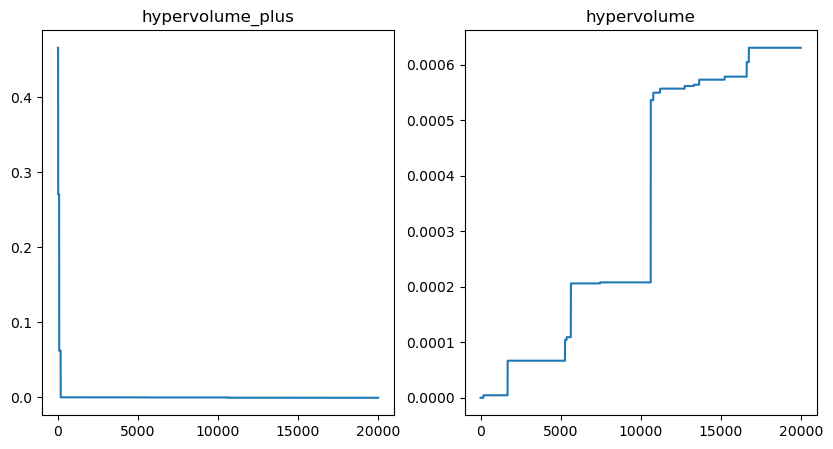

In [25]:
import matplotlib.pyplot as plt
import random

hv_plus = []
hv = []
n_obj = 3
moa = get_archive(reference_point=[0.1] * n_obj, n_obj=n_obj)
for _ in range(20000):
    point = [random.random() for _ in range(n_obj)]
    moa.add(point)
    
    hv_plus.append(moa.hypervolume_plus)
    hv.append(moa.hypervolume)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hv_plus)
axs[0].set_title("hypervolume_plus")
axs[1].plot(hv)
axs[1].set_title("hypervolume")
plt.show()